## Analisis K-Means

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Import Data
df = pd.read_excel("data mahasiswa.xlsx", usecols=[1,2,3,4])
df

,Skor Penghasilan Ayah dan Ibu,Skor Jenis Pekerjaan,Skor Jumlah Tanggungan,Skor status rumah
0,4,3,3,5
1,1,2,4,5
2,3,8,2,5
3,1,5,3,5
4,1,2,3,5
...,...,...,...,...
151,5,4,5,5
152,5,8,3,5
153,5,8,3,5
154,5,7,5,5


### Scaling Data
scaling hanya opsi jika model cluster yang kita buat memiliki score yang kurang optimal. adapun sebaliknya jika model memakai fitur scaling dan hasil nya kurang optimal, lebih baik tidak usah pake.

In [ ]:
#from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
#scaler = RobustScaler() #inisialisasi scaling
#x_scaled = scaler.fit_transform(df)
#pd.DataFrame(x_scaled)

### Elbow Methode

Pada metode Elbow, kita sebenarnya memvariasikan jumlah cluster ( K ) dari 1 – 10. Untuk setiap nilai K, kita menghitung WCSS ( Within-Cluster Sum of Square ). WCSS adalah jumlah kuadrat jarak antara setiap titik dan centroid dalam sebuah cluster. Saat kita memplot WCSS dengan nilai K, plotnya terlihat seperti Siku. Seiring bertambahnya jumlah cluster, nilai WCSS akan mulai berkurang. Nilai WCSS terbesar ketika K = 1. Ketika kita menganalisis grafik kita dapat melihat bahwa grafik akan berubah dengan cepat pada suatu titik dan dengan demikian menciptakan bentuk siku. Dari titik ini, grafik mulai bergerak hampir sejajar dengan sumbu X. Nilai K yang sesuai dengan titik ini adalah nilai K optimal atau jumlah cluster yang optimal.

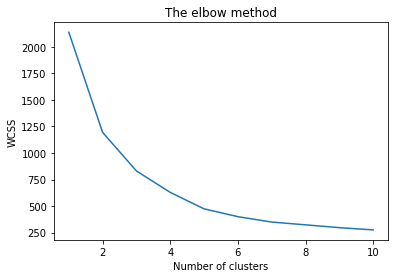

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 2)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### Silhoutte Score

Metode silhouette coefficient merupakan gabungan dari dua metode yaitu metode cohesion yang berfungsi untuk mengukur seberapa dekat relasi antara objek dalam sebuah cluster, dan metode separation yang berfungsi untuk mengukur seberapa jauh sebuah cluster terpisah dengan cluster lain. Tahapan perhitungan silhouette coefficient .

Nilai hasil silhouette coefficient terletak pada kisaran nilai -1 hingga 1. Semakin nilai silhouette coefficient mendekati nilai 1, maka semakin baik pengelompokan data dalam satu cluster. Sebaliknya jika silhouette coefficient mendekati nilai -1, maka semakin buruk pengelompokan data didalam satu cluster.

Referensi : http://nopi-en.blogspot.com/2018/11/pengujian-silhouette-coefficient.html

https://scikit-learn.org/stable/modules/clustering.html

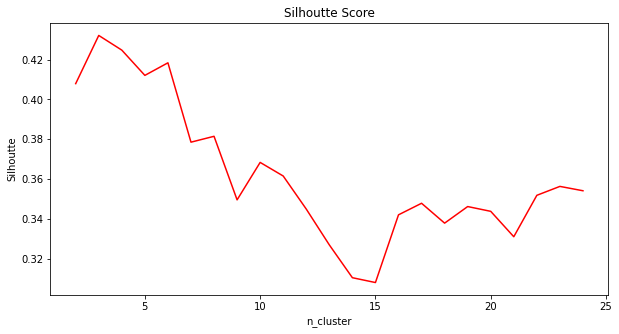

In [ ]:
from sklearn.metrics import silhouette_score

# Inisialisasi jumlah K
score = []
for k in range(2, 25):
  kmeans_sil = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  label = kmeans_sil.fit_predict(df)

  siluet = silhouette_score(df, label, metric='euclidean')
  score.append(siluet)

# Visualisasi K-terbaik dengan silhoutte Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 25), score, "r-")
plt.title('Silhoutte Score')
plt.ylabel("Silhoutte")
plt.xlabel("n_cluster");

In [ ]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("Jika Jumlah Cluster = {0}, Maka Score Silhouette = {1}".format(num_clusters, silhouette_avg))

Jika Jumlah Cluster = 2, Maka Score Silhouette = 0.40791897593450144
Jika Jumlah Cluster = 3, Maka Score Silhouette = 0.4321194118241115
Jika Jumlah Cluster = 4, Maka Score Silhouette = 0.42474890650943
Jika Jumlah Cluster = 5, Maka Score Silhouette = 0.4120647484775067
Jika Jumlah Cluster = 6, Maka Score Silhouette = 0.4183773163489975
Jika Jumlah Cluster = 7, Maka Score Silhouette = 0.3785224099093642
Jika Jumlah Cluster = 8, Maka Score Silhouette = 0.3814723004449478


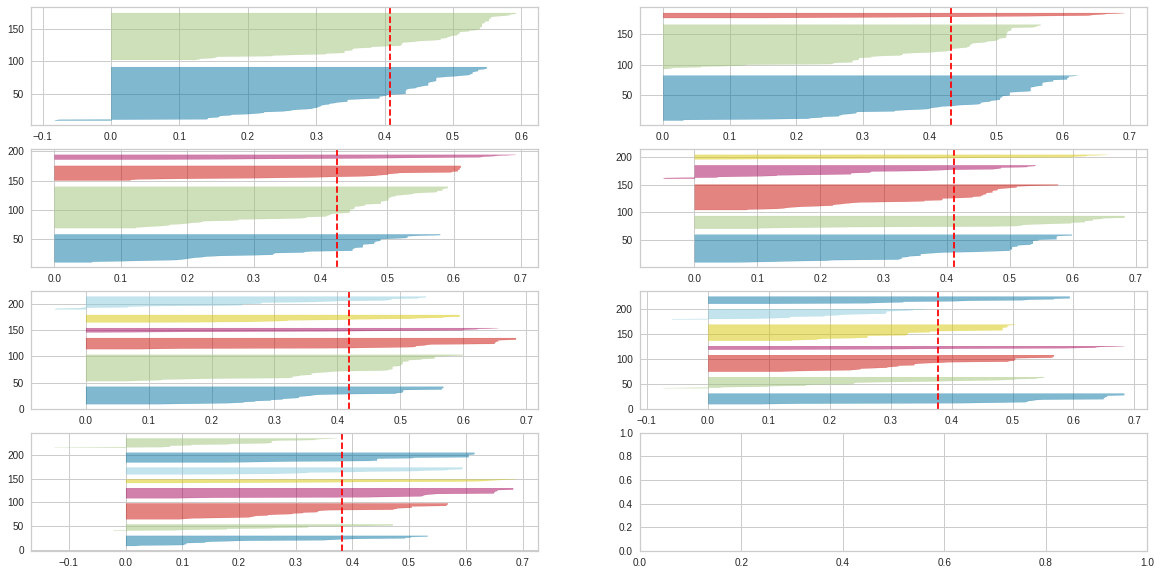

In [ ]:
# Melihat Silhoutte Score dengan Visualisasi
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(20,10))
for i in [2, 3, 4, 5, 6, 7, 8]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(df)
df['cluster'] = pd.DataFrame(y_kmeans)
df

,Skor Penghasilan Ayah dan Ibu,Skor Jenis Pekerjaan,Skor Jumlah Tanggungan,Skor status rumah,cluster
0,4,3,3,5,1
1,1,2,4,5,3
2,3,8,2,5,7
3,1,5,3,5,7
4,1,2,3,5,3
...,...,...,...,...,...
151,5,4,5,5,1
152,5,8,3,5,6
153,5,8,3,5,6
154,5,7,5,5,5


In [ ]:
# Melihat nilai Centroid
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1,2,3,4
0,4.533333,1.133333,3.666667,5.0,2.000000e+00
1,4.529412,3.794118,3.911765,5.0,2.000000e+00
2,5.142857,8.785714,4.071429,5.0,1.000000e+00
3,1.136364,2.363636,2.818182,5.0,2.000000e+00
4,11.125000,8.375000,2.750000,5.0,2.220446e-16
5,4.545455,7.090909,4.590909,5.0,-2.220446e-16
6,5.421053,7.157895,2.526316,5.0,0.000000e+00
7,1.818182,6.954545,2.818182,5.0,1.000000e+00


In [ ]:
# Get the cluster labels
labels = kmeans.labels_

In [ ]:
# calculate cluster count
cluster_count = df.groupby(['cluster']).size().reset_index(name='count')
cluster_count

,cluster,count
0,0,15
1,1,34
2,2,14
3,3,22
4,4,8
5,5,22
6,6,19
7,7,22


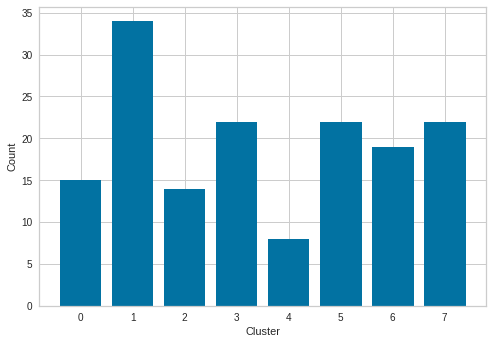

In [ ]:
# plot bar plot
plt.bar(x=cluster_count['cluster'], height=cluster_count['count'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

<Figure size 1080x720 with 0 Axes>

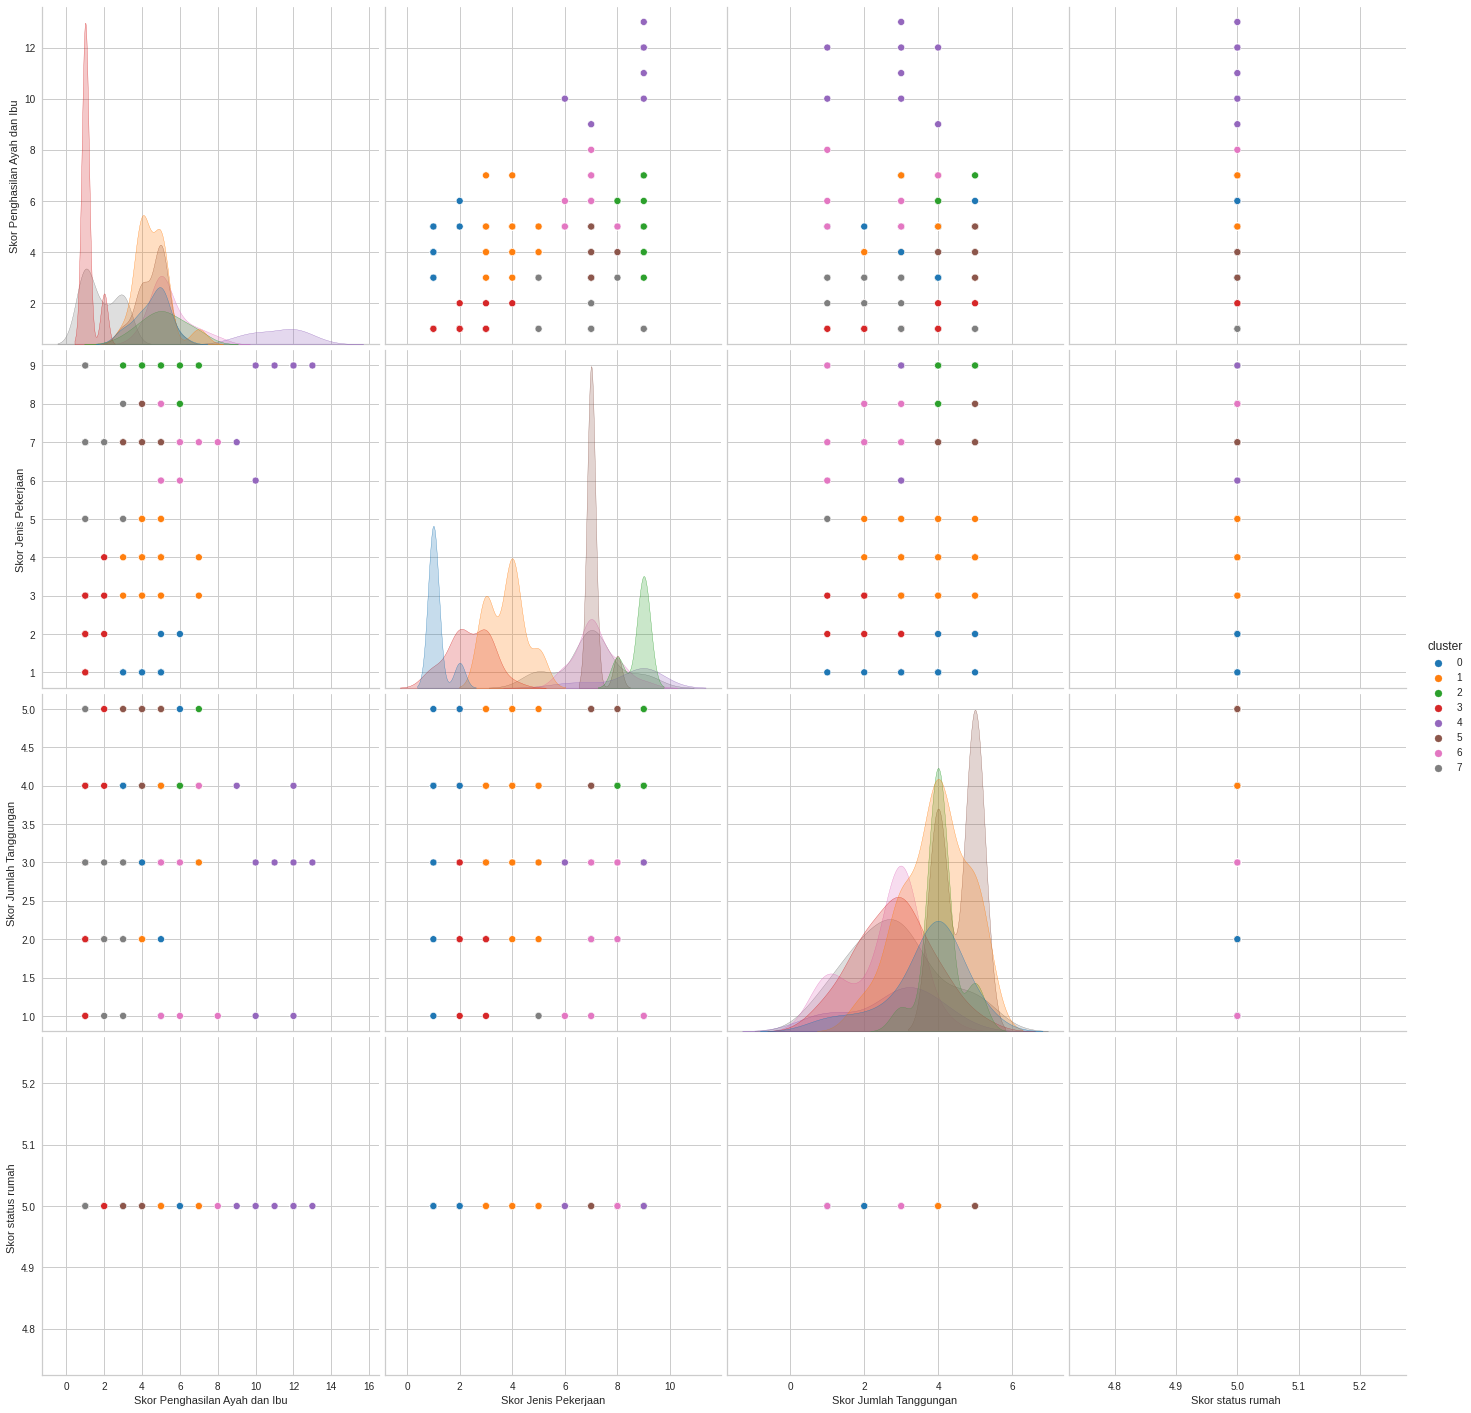

In [ ]:
# Import Library Seaborn
import seaborn as sns
# plot pairplot
# Set the size of the plot
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='cluster', palette='tab10', height=5)

In [ ]:
import plotly.express as px
# Create scatter matrix using Plotly
fig = px.scatter_matrix(df, dimensions=df.columns[:-1], color='cluster', symbol='cluster',
                        title='Scatter matrix for k-means clustering with k=8')

# Update figure layout
fig.update_layout(width=1200, height=1200, title_font_size=24)

# Show the scatter matrix
fig.show()

In [ ]:
# Import all data
df1 = pd.read_excel("data mahasiswa.xlsx")
df1['cluster'] = pd.DataFrame(y_kmeans)
df1

,Nama,Skor Penghasilan Ayah dan Ibu,Skor Jenis Pekerjaan,Skor Jumlah Tanggungan,Skor status rumah,cluster
0,AHMAD FAUJI,4,3,3,5,2
1,ELA AMELIA SARI,1,2,4,5,3
2,FARHAN ASSEGAF,3,8,2,5,0
3,SAEFUL MUHID,1,5,3,5,0
4,SISCA YULIANTINA,1,2,3,5,3
...,...,...,...,...,...,...
151,ANDI PUTRAMA,5,4,5,5,2
152,ARDHI RAHMADHI ANUGRAH,5,8,3,5,7
153,DAFFA WIDOSENO ARDRAS,5,8,3,5,7
154,DEA SAFRYDA PUTRI,5,7,5,5,6


In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df1.to_excel("Output_kmeans.xlsx", index=False)